In [37]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np


In [38]:
video_path = r'032fa596158155a8c93f8fe5747fb80f.mp4'
capture = cv2.VideoCapture(video_path)

count = 0
frame1, frame2 = None, None
while True:
    ret, frame = capture.read()
    count += 1
    if not ret:
        break
    if count == 100:
        frame1 = frame
    if count == 3000:
        frame2 = frame
    if count >= 3000:
        break
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
frame1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB)
frame2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2RGB)

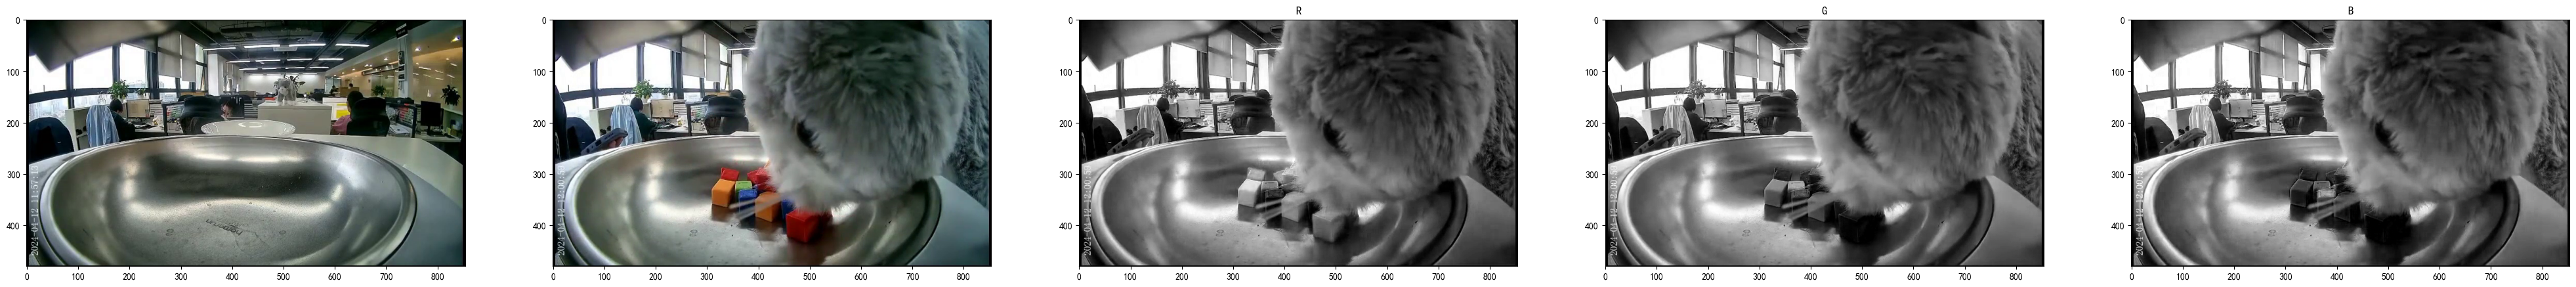

In [36]:


plt.figure(figsize=(50,5))
plt.subplot(151)
plt.imshow(frame1)
plt.subplot(152)
plt.imshow(frame2)

plt.subplot(153)
plt.imshow(frame2[:,:,0],'gray')
plt.title("R")

plt.subplot(154)
plt.imshow(frame2[:,:,1],'gray')
plt.title("G")

plt.subplot(155)
plt.imshow(frame2[:,:,2],'gray')
plt.title("B")
plt.show()

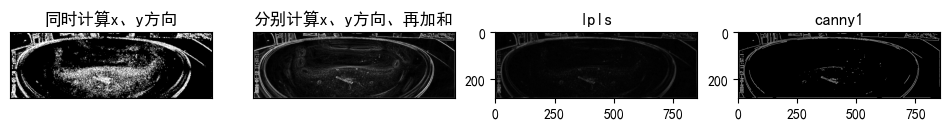

In [4]:
#同时计算x、y方向

image = frame1[200:,:,:]
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
sobelxy1 = cv2.Sobel(image,cv2.CV_64F,1,1,ksize=3)        
sobelxy1 = cv2.convertScaleAbs(sobelxy1) > 10
#分别计算x、y方向
sobelx = cv2.Sobel(image,cv2.CV_64F,1,0,ksize=3)
sobelx = cv2.convertScaleAbs(sobelx)
sobely = cv2.Sobel(image,cv2.CV_64F,0,1,ksize=3)
sobely = cv2.convertScaleAbs(sobely)
sobelxy2 = cv2.addWeighted(sobelx,0.5,sobely,0.5,0)

plt.rcParams['font.sans-serif'] = ['SimHei']        #文字字体为黑体
plt.figure(figsize=(12,5))
plt.subplot(141)
plt.imshow(sobelxy1,cmap='gray')
plt.title('同时计算x、y方向')
plt.xticks([]),plt.yticks([])

plt.subplot(142)
plt.imshow(sobelxy2,cmap='gray')
plt.title('分别计算x、y方向、再加和')
plt.xticks([]),plt.yticks([])



src = cv2.GaussianBlur(image, (0, 0), 1)
dst = cv2.Laplacian(src, cv2.CV_32F, ksize=1, delta=0)
lpls1 = cv2.convertScaleAbs(dst)

plt.subplot(143)
plt.imshow(lpls1, cmap="gray")
plt.title("lpls")

Canny1=cv2.Canny(image,220,250) 

plt.subplot(144)
plt.imshow(Canny1, cmap="gray")
plt.title("canny1")
plt.show()


In [5]:
cv2.imwrite('mask.jpg',dst)

True

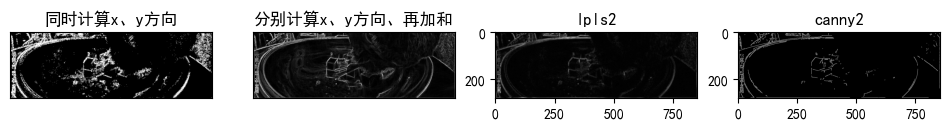

In [6]:

image = frame2[200:,:,:]
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
sobelxy1 = cv2.Sobel(image,cv2.CV_64F,1,1,ksize=3)        
sobelxy1 = cv2.convertScaleAbs(sobelxy1) > 10
#分别计算x、y方向
sobelx = cv2.Sobel(image,cv2.CV_64F,1,0,ksize=3)
sobelx = cv2.convertScaleAbs(sobelx)
sobely = cv2.Sobel(image,cv2.CV_64F,0,1,ksize=3)
sobely = cv2.convertScaleAbs(sobely)
sobelxy2 = cv2.addWeighted(sobelx,0.5,sobely,0.5,0)

plt.rcParams['font.sans-serif'] = ['SimHei']        #文字字体为黑体
plt.figure(figsize=(12,5))
plt.subplot(141)

plt.imshow(sobelxy1,cmap='gray')
plt.title('同时计算x、y方向')
plt.xticks([]),plt.yticks([])

plt.subplot(142)
plt.imshow(sobelxy2,cmap='gray')
plt.title('分别计算x、y方向、再加和')
plt.xticks([]),plt.yticks([])



src = cv2.GaussianBlur(image, (0, 0), 1)
dst = cv2.Laplacian(src, cv2.CV_32F, ksize=3, delta=0)
lpls2 = cv2.convertScaleAbs(dst)

plt.subplot(143)
plt.imshow(lpls2, cmap="gray")
plt.title("lpls2")

Canny2=cv2.Canny(image,220,250) 
plt.subplot(144)
plt.imshow(Canny2, cmap="gray")
plt.title("canny2")
plt.show()


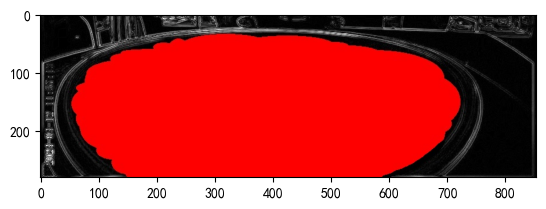

In [7]:
mask = cv2.imread("mask_red.jpg")
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
plt.imshow(mask)
plt.show()

In [8]:
print(mask.shape)
for i in range(mask.shape[0]):
    for j in range(mask.shape[1]):
        if mask[i,j,0] >= 240 and mask[i,j,1] <= 10 and mask[i,j,2] <= 10:
            mask[i,j,0] = 255
            mask[i,j,1] = 255
            mask[i,j,2] = 255
            continue
        else:
            mask[i,j,0] = 0
            mask[i,j,1] = 0
            mask[i,j,2] = 0

(280, 854, 3)


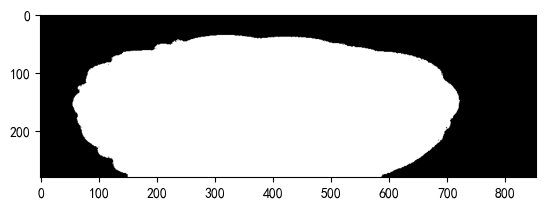

In [9]:
plt.imshow(mask)
plt.show()

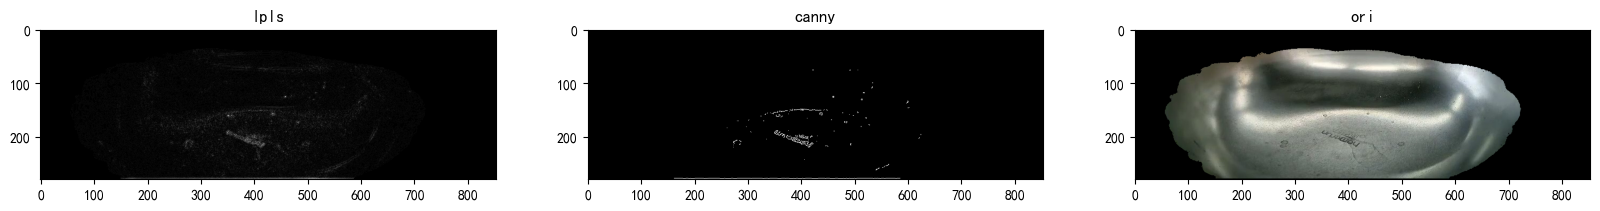

In [10]:
plt.figure(figsize=(20,10))
image1 = lpls1
plt.subplot(131)
image1 = cv2.bitwise_and(image1, image1, mask=mask[:,:,0])
plt.imshow(image1, 'gray')
plt.title('lpls')

plt.subplot(132)
image1 = Canny1
image1 = cv2.bitwise_and(image1, image1, mask=mask[:,:,0])
plt.imshow(image1, 'gray')
plt.title('canny')

plt.subplot(133)
image1 = frame1[200:,:,:]
image1 = cv2.bitwise_and(image1, image1, mask=mask[:,:,0])
plt.imshow(image1)
plt.title('ori')
plt.show()

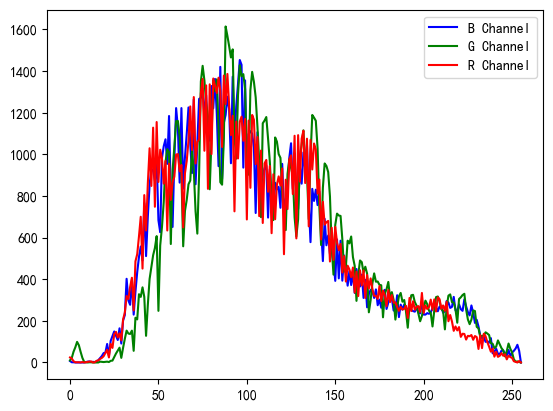

In [11]:
# plt.imshow(image1)
# plt.show()
#计算直方图（彩图）

    # 1、读取图片


    # 设置颜色通道
color = ["b", "g", "r"]
ori1 = image1
    # 2、获取直方图
for i, c in enumerate(color):           #i是索引，c是内容
    hist = cv2.calcHist([image1], [i], None, [256], [1, 256])
    plt.plot(hist, color=c)
 
    # 3、直方图展示
plt.legend(["B Channel", "G Channel", "R Channel"])     #批注
plt.show()

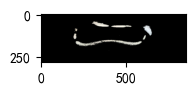

In [12]:
plt.subplot(131)
mask_ori1 = np.zeros_like(image1[:,:,0])
mask_ori1[np.where(image1[:,:,0]>200)] = 255
ori1_result = cv2.bitwise_and(ori1, ori1, mask=mask_ori1)
plt.imshow(ori1_result)
plt.show()

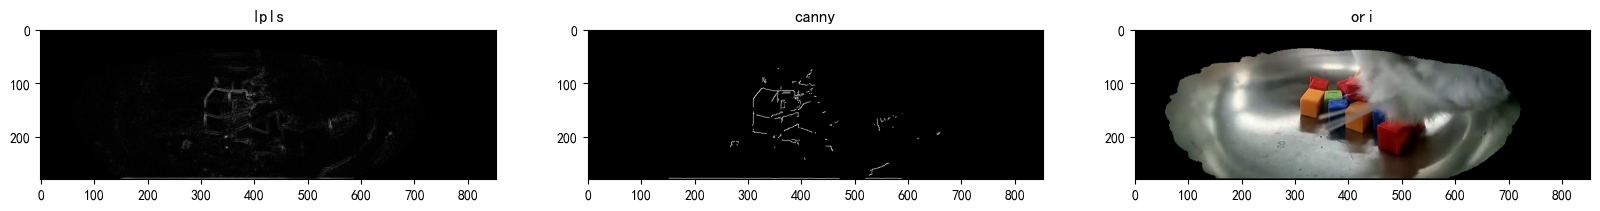

In [54]:
plt.figure(figsize=(20,10))

image1 = lpls2
plt.subplot(131)
image1 = cv2.bitwise_and(image1, image1, mask=mask[:,:,0])
plt.imshow(image1, 'gray')
plt.title('lpls')

image1 = Canny2
plt.subplot(132)
Canny2_with_mask = cv2.bitwise_and(image1, image1, mask=mask[:,:,0])
plt.imshow(Canny2_with_mask, 'gray')
plt.title('canny')

plt.subplot(133)
image1 = frame2[200:,:,:]
ori_image_with_mask = cv2.bitwise_and(image1, image1, mask=mask[:,:,0])
plt.imshow(ori_image_with_mask)
plt.title('ori')
plt.show()

midval: 93.0
midval: 97.0
midval: 92.0


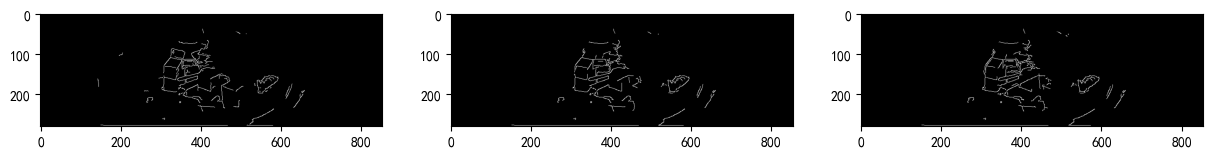

In [55]:
image1 = frame2[200:,:,:]
image1_GaussianBlur = cv2.GaussianBlur(image1, (5,5), 0)
# 求自适应阈值的最小和最大值
def GetMatMinMaxThreshold(img, sigma=0.2):

    midval = np.median(img)
    print("midval:", midval)
    # 计算低阈值
    minval = int((1.0 - sigma) * midval)
    # 计算高阈值
    maxval = int((1.0 + sigma) * midval)
    return minval ,maxval

plt.figure(figsize=(15,5))
for i in range(3):
    image_single_channel = image1_GaussianBlur[:,:,i]
    minval, maxval = GetMatMinMaxThreshold(image_single_channel)   
    Canny2_image_single_channel=cv2.Canny(image_single_channel,minval,maxval) 
    Canny2_image_single_channel = cv2.bitwise_and(Canny2_image_single_channel, Canny2_image_single_channel, mask=mask[:,:,0])
    plt.subplot(130+i+1)
    plt.imshow(Canny2_image_single_channel, 'gray')
plt.show()



In [56]:
import numpy as np
np.median(np.array([1,2,3,2,3])),np.median(image1[:,:,1]),np.median(image1[:,:,2])

(2.0, 97.0, 92.0)

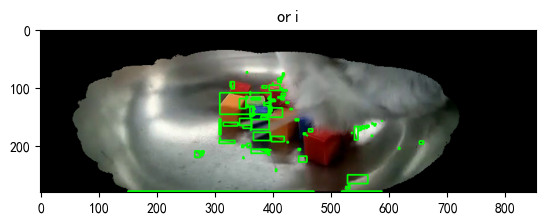

In [57]:
contours, hierarchy = cv2.findContours(Canny2_with_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
ori_image_with_mask_temp = np.copy(ori_image_with_mask)
for c in contours:
    # 找到边界坐标
    x, y, w, h = cv2.boundingRect(c)  # 计算点集最外面的矩形边界
    cv2.rectangle(ori_image_with_mask_temp, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # 找面积最小的矩形
    rect = cv2.minAreaRect(c)
    # 得到最小矩形的坐标
    box = cv2.boxPoints(rect)
    # 标准化坐标到整数
    box = np.int0(box)
    # 画出边界
    # cv2.drawContours(ori_image_with_mask, [box], 0, (0, 0, 255), 3)
    # 计算最小封闭圆的中心和半径
    (x, y), radius = cv2.minEnclosingCircle(c)
    # 换成整数integer
    center = (int(x),int(y))
    radius = int(radius)
    # 画圆
    # cv2.circle(ori_image_with_mask, center, radius, (0, 255, 0), 2)
plt.imshow(ori_image_with_mask_temp)
plt.title('ori')
plt.show()

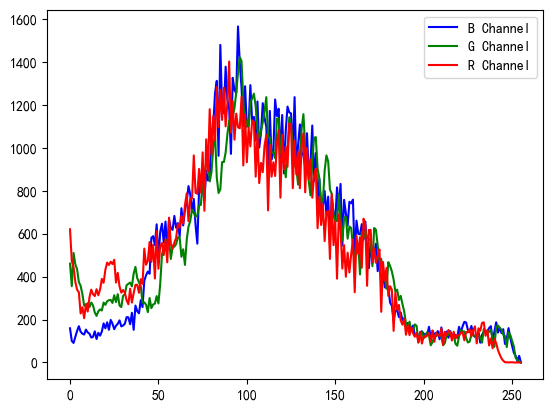

In [14]:
# 设置颜色通道
color = ["b", "g", "r"]

# 2、获取直方图
for i, c in enumerate(color):           #i是索引，c是内容
    hist = cv2.calcHist([image1], [i], None, [256], [1, 256])
    plt.plot(hist, color=c)
 
    # 3、直方图展示
plt.legend(["B Channel", "G Channel", "R Channel"])     #批注
plt.show()

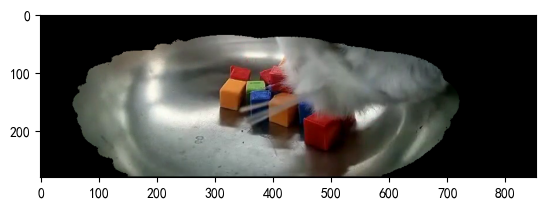

In [15]:
plt.imshow(image1)
plt.show()

In [ ]:
[r,g,b]
r - g > 5 * 10

In [ ]:
r_part = r * min(max(r - g, 15) + 5, 0) / 20
g_part = g * (1 -  min(max(r - g, 15) + 5, 0) / 20)



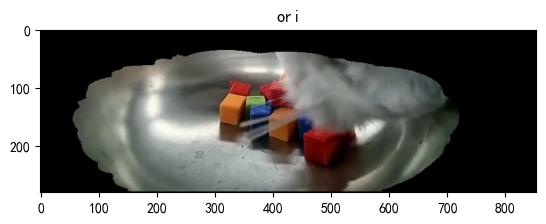

In [58]:
plt.imshow(ori_image_with_mask)
plt.title('ori')
plt.show()

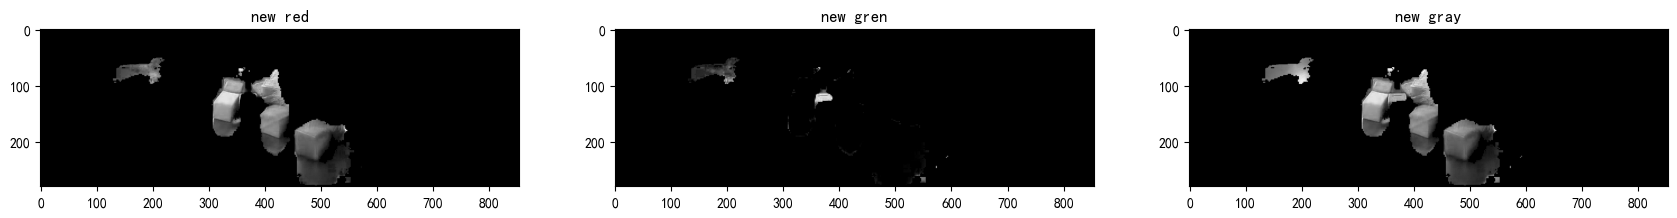

In [77]:
new_image = np.zeros_like(ori_image_with_mask)

def calculate_ratio(r, g, b):
    if b > (r - 15):
        return 0, 0
    if max([r,g,b]) - min([r,g,b]) < 20:
        return 0,0
    ratio = max(min(r - g, 15) + 5, 0) / 20
    return ratio, 1 - ratio
mask_new_image = np.zeros_like(ori_image_with_mask)
for row in range(ori_image_with_mask.shape[0]):
    for col in range(ori_image_with_mask.shape[1]):
        r, g, b = list(map(lambda x : int(x),[ori_image_with_mask[row,col,0],ori_image_with_mask[row,col,1],ori_image_with_mask[row,col,2]]))
        
        r_part = r * calculate_ratio(r, g, b)[0]
        g_part = g * calculate_ratio(r, g, b)[1]
        new_image[row, col, 2] = max(0, min(255, int(r_part + g_part)))
        new_image[row, col, 1] = max(0, min(255, int(g_part)))
        new_image[row, col, 0] = max(0, min(255, int(r_part)))
        if max(0, min(255, int(r_part + g_part))) > 10:
            mask_new_image[row, col, 0] = 255
plt.figure(figsize=(20,7))
plt.subplot(141)
plt.imshow(new_image[:,:,0], 'gray')
plt.title('new red')
plt.subplot(142)
plt.imshow(new_image[:,:,1], 'gray')
plt.title('new gren')
plt.subplot(143)
plt.imshow(new_image[:,:,2], 'gray')
plt.title('new gray')
plt.show()

In [74]:
max([1,3,5])

5